## 3-DOF Manipulator Design Calculator - SCARA PRR V3

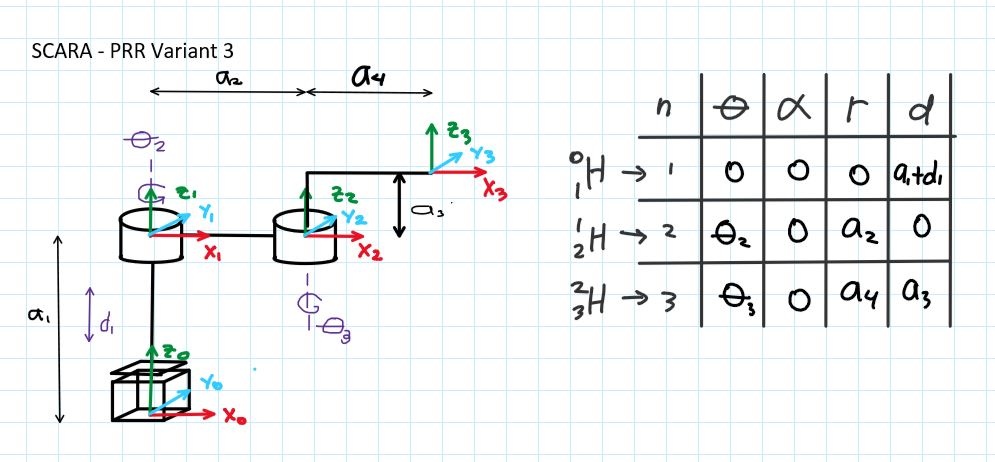

In [1]:
from IPython.display import Image
Image(filename="SCARA-PRR-3.jpg",width=50,height=50)

In [10]:
import numpy as np
import math
import PySimpleGUI as sg
import pandas as pd

# GUI code

sg.theme('DarkRed1')

# Excel read code

EXCEL_FILE = 'SCARA_PRR_V3_FK.xlsx'
df = pd.read_excel(EXCEL_FILE)

# Lay-out code

layout = [
    [sg.Push(), sg.Text('SCARA PRR V3 MEXE Calculator', font = ("Comic Sans MS", 15)), sg.Push()],

    [sg.Text('Forward Kinematics Calculator', font = ("Comic Sans MS", 12))],

    [sg.Text('Fill out the following fields:', font = ("Comic Sans MS", 10)),
    sg.Push(), sg.Button('Click this before Solving Forward Kinematics', 
    font = ("Comic Sans MS", 15), size=(35,0), button_color=('white', 'purple')), sg.Push()],

    [sg.Text('a1 = ', font = ("Comic Sans MS", 10)),sg.InputText('55', key='a1', size=(20,10)),
    sg.Text('d1 = ',font = ("Comic Sans MS", 10)),sg.InputText('0',key='d1', size=(20,10)),
    sg.Push(), sg.Button('Jacobian Matrix (J)', font = ("Comic Sans MS", 12), size=(15,0), 
    button_color=('white', 'green')),
    sg.Button('Det(J)', font = ("Comic Sans MS", 12), size=(15,0), button_color=('white', 'green')),
    sg.Button('Inverse of J', font = ("Comic Sans MS", 12), size=(15,0), button_color=('white', 'green')),
    sg.Button('Transpose of J', font = ("Comic Sans MS", 12), size=(15,0), button_color=('white', 'green')), 
    sg.Push()],

    [sg.Text('a2 = ', font = ("Comic Sans MS", 10)),sg.InputText('60',key='a2', size=(20,10)),
    sg.Text('T2 = ',font = ("Comic Sans MS", 10)),
    sg.InputText('0',key='T2', size=(20,10))],

    [sg.Text('a3 = ', font = ("Comic Sans MS", 10)),sg.InputText('30',key='a3', size=(20,10)),
    sg.Text('T3 = ',font = ("Comic Sans MS", 10)),
    sg.InputText('0',key='T3', size=(20,10)),
    sg.Push(), sg.Button('Inverse Kinematics', font = ("Comic Sans MS", 12), size=(35,0), 
    button_color=('black', 'pink')), sg.Push()],

    [sg.Text('a4 = ', font = ("Comic Sans MS", 10)),sg.InputText('60',key='a4', size=(20,10))],
    
    [sg.Button('Solve Forward Kinematics', font = ("Comic Sans MS", 12), button_color=('white', 'red')), sg.Push(),
    sg.Push(),sg.Button('Path and Trajectory Planning', font = ("Comic Sans MS", 12), size=(40,0), 
    button_color=('white', 'black')), sg.Push()],

    [sg.Frame('Position Vector: ',[[
        sg.Text('X = ', font = ("Comic Sans MS", 10)),sg.InputText(key='X', size=(10,1)),
        sg.Text('Y = ', font = ("Comic Sans MS", 10)),sg.InputText(key='Y', size=(10,1)),
        sg.Text('Z = ', font = ("Comic Sans MS", 10)),sg.InputText(key='Z', size=(10,1))]])],

    [sg.Push(), sg.Frame('H0_3 Transformation Matrix = ',[[sg.Output(size=(60,12))]]),
    sg.Push(),sg.Image('SCARA_V3.gif'), sg.Push()],

    [sg.Submit(font = ("Comic Sans MS", 10)),sg.Exit(font = ("Comic Sans MS", 10))]


    ]


# Window Code
window = sg.Window('SCARA-PRR-V3 Manipulator Forward Kinematics',layout, resizable=True)

# Variable Codes for disabling buttons

disable_J = window['Jacobian Matrix (J)']
disable_DetJ = window['Det(J)']
disable_IV = window['Inverse of J']
disable_TJ = window['Transpose of J']
disable_IK = window['Inverse Kinematics']
disable_PT = window['Path and Trajectory Planning']

while True:
    event,values = window.read()
    if event == sg.WIN_CLOSED or event == 'Exit':
        break

    if event == 'Click this before Solving Forward Kinematics':
        disable_J.update(disabled=True)
        disable_DetJ.update(disabled=True)
        disable_IV.update(disabled=True) 
        disable_TJ.update(disabled=True)
        disable_IK.update(disabled=True)
        disable_PT.update(disabled=True)


    if event == 'Solve Forward Kinematics':
        # Forward Kinematic Codes
        a1 = float(values['a1'])
        a2 = float(values['a2'])
        a3 = float(values['a3'])
        a4 = float(values['a4'])

        d1 = float(values['d1'])
        T2 = float(values['T2'])
        T3 = float(values['T3'])

        T2 = (T2/180.0)*np.pi # Theta 2 in radians
        T3 = (T3/180.0)*np.pi # Theta 3 in radians

        PT = [[(0.0/180.0)*np.pi,(0.0/180.0)*np.pi,0,a1+d1],
            [T2,(0.0/180.0)*np.pi,a2,0],
            [T3,(0.0/180.0)*np.pi,a4,a3]]

        i = 0
        H0_1 = [[np.cos(PT[i][0]),-np.sin(PT[i][0])*np.cos(PT[i][1]),np.sin(PT[i][0])*np.sin(PT[i][1]),PT[i][2]*np.cos(PT[i][0])],
                [np.sin(PT[i][0]),np.cos(PT[i][0])*np.cos(PT[i][1]),-np.cos(PT[i][0])*np.sin(PT[i][1]),PT[i][2]*np.sin(PT[i][0])],
                [0,np.sin(PT[i][1]),np.cos(PT[i][1]),PT[i][3]],
                [0,0,0,1]]

        i = 1
        H1_2 = [[np.cos(PT[i][0]),-np.sin(PT[i][0])*np.cos(PT[i][1]),np.sin(PT[i][0])*np.sin(PT[i][1]),PT[i][2]*np.cos(PT[i][0])],
                [np.sin(PT[i][0]),np.cos(PT[i][0])*np.cos(PT[i][1]),-np.cos(PT[i][0])*np.sin(PT[i][1]),PT[i][2]*np.sin(PT[i][0])],
                [0,np.sin(PT[i][1]),np.cos(PT[i][1]),PT[i][3]],
                [0,0,0,1]]

        i = 2
        H2_3 = [[np.cos(PT[i][0]),-np.sin(PT[i][0])*np.cos(PT[i][1]),np.sin(PT[i][0])*np.sin(PT[i][1]),PT[i][2]*np.cos(PT[i][0])],
                [np.sin(PT[i][0]),np.cos(PT[i][0])*np.cos(PT[i][1]),-np.cos(PT[i][0])*np.sin(PT[i][1]),PT[i][2]*np.sin(PT[i][0])],
                [0,np.sin(PT[i][1]),np.cos(PT[i][1]),PT[i][3]],
                [0,0,0,1]]

        H0_1 = np.matrix(H0_1)

        H0_2 = np.dot(H0_1,H1_2)
        H0_3 = np.dot(H0_2,H2_3)

        print("H0_3=")
        print(np.matrix(H0_3))

        X0_3 = H0_3[0,3]
        print("X = ", X0_3)
        
        Y0_3 = H0_3[1,3]
        print("Y = ",Y0_3)

        Z0_3 = H0_3[2,3]
        print("Z = ",Z0_3)

        disable_J.update(disabled=False)
        disable_IK.update(disabled=False)
        disable_PT.update(disabled=False)
        

    if event == 'Submit':
        df = df.append(values, ignore_index=True)
        df.to_excel(EXCEL_FILE, index=False)
        sg.popup('Data saved!')
    
    if event == 'Jacobian Matrix (J)':
        Z_1 = [[0],[0],[1]] # The [0,0,1] vector

        # Row 1 - 3, Column 1

        J1 = [[1,0,0],[0,1,0],[0,0,1]]
        J1 = np.dot(J1,Z_1)
        J1 = np.matrix(J1)
        #print('J1 = ')
        #print(np.matrix(J1))

        # Row 1 - 3, Column 2

        J2a = H0_1[0:3,0:3]
        J2a = np.dot(J2a,Z_1)
        #print("J2a = ")
        #print(J2a)

        J2b_1 = H0_3[0:3,3:]
        J2b_1 = np.matrix(J2b_1)
        # print(J2b_1)

        J2b_2 = H0_1[0:3,3:]
        J2b_2 = np.matrix(J2b_2)
        # print(J2b_2)

        J2b = J2b_1 - J2b_2
        #print("J2b = ")
        #print(J2b)

        J2 = [[(J2a[1,0]*J2b[2,0])-(J2a[2,0]*J2b[1,0])],
            [(J2a[2,0]*J2b[0,0])-(J2a[0,0]*J2b[2,0])],
            [(J2a[0,0]*J2b[1,0])-(J2a[1,0]*J2b[0,0])]]
        #print("J2 = ")
        #print(np.matrix(J2))

        # Row 1 - 3, Column 3

        J3a = H0_1[0:3,0:3]
        J3a = np.dot(J3a,Z_1)
        #print("J3a = ")
        #print(J3a)

        J3b_1 = H0_3[0:3,3:]
        J3b_1 = np.matrix(J3b_1)

        J3b_2 = H0_2[0:3,3:]
        J3b_2 = np.matrix(J3b_2)

        J3b = J3b_1 - J3b_2
        #print('J3b = ')
        #print(J3b)

        J3 = [[(J3a[1,0]*J3b[2,0])-(J3a[2,0]*J3b[1,0])],
            [(J3a[2,0]*J3b[0,0])-(J3a[0,0]*J3b[2,0])],
            [(J3a[0,0]*J3b[1,0])-(J3a[1,0]*J3b[0,0])]]
        #print("J3 = ")
        #print(np.matrix(J3))

        J4 = [[0],[0],[0]]
        J4 = np.matrix(J4)
        #print("J4 = ")
        #print(J4)

        J5 = H0_1[0:3,0:3]
        J5 = np.dot(J5,Z_1)
        J5 = np.matrix(J5)
        #print("J5 = ")
        #print(J5)

        J6 = H0_1[0:3,0:3]
        J6 = np.dot(J6,Z_1)
        J6 = np.matrix(J6)
        #print("J6 = ")
        #print(J6)

        JM1 = np.concatenate((J1,J2,J3),1)
        # print(JM1)
        JM2 =np.concatenate((J4,J5,J6),1)
        # print(JM2)

        J = np.concatenate((JM1,JM2),0)
        #print("J = ")
        #print(J)

        sg.popup('J = ',J)

        disable_J.update(disabled=True)
        disable_DetJ.update(disabled=False)
        disable_IV.update(disabled=False)
        disable_TJ.update(disabled=False)

    if event == 'Det(J)':
        # singularity = Det(J)
        # np.linalg.det(M)
        # Let JM1 become the 3x3 position matrix for obtaining the Determinant

        DJ = np.linalg.det(JM1)
        #print("DJ = ",DJ)
        sg.popup('DJ = ',DJ)

        if DJ == 0.00000:
            disable_IV.update(disabled=True)
            sg.popup('Warning: Jacobian Matrix is Non-Invertible!')

    if event == 'Inverse of J':
        # Inv(J)

        IJ = np.linalg.inv(JM1)
        #print("IV = ")
        #print(IV)
        sg.popup('IJ = ',IJ)

    if event == 'Transpose of J':
        # Transpose of Jacobian Matrix

        TJ = np.transpose(JM1)
        #print("TJ = ")
        #print(TJ)

        sg.popup('TJ = ',TJ) 




window.close()
